In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import sklearn.metrics as metrics
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
from math import sqrt

ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
solution = pd.read_csv('/Users/n0thing_seri0us/Downloads/housing_test_sample_solution.csv')#.drop(['Id'], axis = 1)
train = pd.read_csv('/Users/n0thing_seri0us/Downloads/housing_train.csv').drop(['total_bedrooms'], axis = 1)
test = pd.read_csv('/Users/n0thing_seri0us/Downloads/housing_test.csv').drop(['total_bedrooms'], axis = 1)

In [ ]:
train = pd.get_dummies(train, drop_first = True)
test = pd.get_dummies(test, drop_first = True).drop(['Id'], axis = 1)

In [5]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-116.46,33.82,6.0,4863.0,3010.0,828.0,3.9508,104200.0,1,0,0,0
1,-117.04,34.00,21.0,4624.0,2174.0,812.0,3.5255,132100.0,1,0,0,0
2,-121.03,37.55,32.0,946.0,624.0,173.0,1.9728,97900.0,1,0,0,0
3,-117.80,33.68,8.0,2032.0,862.0,340.0,6.9133,274100.0,0,0,0,0
4,-122.26,37.83,52.0,1656.0,718.0,382.0,2.6768,182300.0,0,0,1,0


In [144]:
test

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.64,38.24,40.0,1974.0,1039.0,398.0,3.7917,0,0,0,0
1,-119.05,36.09,9.0,3297.0,1749.0,568.0,4.0217,1,0,0,0
2,-116.98,32.85,12.0,3570.0,3321.0,666.0,4.0882,0,0,0,0
3,-118.42,34.20,27.0,3201.0,3403.0,948.0,2.2377,0,0,0,0
4,-118.47,34.01,41.0,2704.0,1047.0,478.0,4.4211,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6187,-118.47,33.99,41.0,1146.0,833.0,270.0,2.5938,0,0,0,0
6188,-124.14,41.95,21.0,2696.0,1208.0,494.0,2.2750,0,0,0,1
6189,-117.88,33.70,17.0,5122.0,2966.0,1339.0,3.4835,0,0,0,0
6190,-118.37,34.07,52.0,2203.0,899.0,384.0,4.2500,0,0,0,0


In [155]:
solution

,Id,median_house_value
0,0,205311.609173
1,1,205311.609173
2,2,205311.609173
3,3,205311.609173
4,4,205311.609173
...,...,...
6187,6187,205311.609173
6188,6188,205311.609173
6189,6189,205311.609173
6190,6190,205311.609173


In [22]:
nan_count_train = train.isna().sum()
print(nan_count_train, train.shape)
train = train.dropna()
# print(Xtrain.shape)

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64 (14448, 12)


In [27]:
nan_count_test = Xtest.isna().sum()
print(nan_count_test, Xtest.shape)

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
population                    0
households                    0
median_income                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64 (3612, 11)


In [10]:
# Xtrain, ytrain = train.drop(['median_house_value'], axis = 1), train['median_house_value']
# Xtest, ytest = test, solution

Xtrain, Xtest, ytrain, ytest = train_test_split(train.drop(['median_house_value'], axis = 1), train['median_house_value'], test_size = 0.25, random_state = 42)

In [11]:
Xtrain.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
population                    0
households                    0
median_income                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

## Заполним пропуски в тесте медианой


In [31]:
test = test.fillna(Xtest.median())
nan_count_test = test.isna().sum()
nan_count_test

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
population                    0
households                    0
median_income                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

# Перейти в раздел заново


## Обычная LinReg

In [38]:
LinRegNoScale = LinearRegression()
LinRegNoScale.fit(Xtrain, ytrain)
predNoScale = LinRegNoScale.predict(Xtest)
print(metrics.r2_score(predNoScale, ytest))
print(metrics.mean_squared_error(predNoScale, ytest))
print(predNoScale)
print(ytest)

0.4093914664546141
4866732153.259034
[105554.27876707 248014.81174489 243829.90191445 ... 327875.9759918
 135854.1601424  108374.64345806]
7834     129200.0
12458    185200.0
2813     200000.0
10483    165100.0
6697     111300.0
           ...   
13995    147800.0
6466     212500.0
2648     349200.0
2586     124700.0
13427    103400.0
Name: median_house_value, Length: 4335, dtype: float64


## Добавим масштабирование

In [27]:
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
# Xtest_scaled = scaler.fit(Xtest)

In [29]:
LinRegScale = LinearRegression()
LinRegScale.fit(Xtrain_scaled, ytrain)
predScale = LinRegScale.predict(Xtest_scaled)
print(metrics.r2_score(ytest, predScale))

ValueError: Found input variables with inconsistent numbers of samples: [2890, 3612]

In [31]:
# Xtrain = pd.DataFrame(Xtrain)
# Xtest = pd.DataFrame(Xtest)
# Xtrain
# ytrain

## L1 без масштабирования

In [95]:
alphas = np.arange(0.0001, 2.1, 0.1)
res = {}
for i in alphas:
    LassoReg = Lasso(alpha = i)
    LassoReg.fit(Xtrain, ytrain)
    predLasso = LassoReg.predict(Xtest)
#     res.append({i: metrics.r2_score(ytrain, predLasso)})
    res[i] = metrics.r2_score(ytest, predLasso)

[0.636666785971215, 0.6366670175142402, 0.6366672490060667, 0.6366674804465515, 0.6366677118357835, 0.6366679431736935, 0.6366681744603424, 0.6366684056956411, 0.6366686368798357, 0.6366688680125553, 0.6366690990941222, 0.6366693301240741, 0.6366695611033266, 0.6366697920308975, 0.6366700229072693, 0.6366702537324482, 0.636670484506441, 0.636670715228517, 0.636670945900104, 0.6366711765197006, 0.6366714070888996]


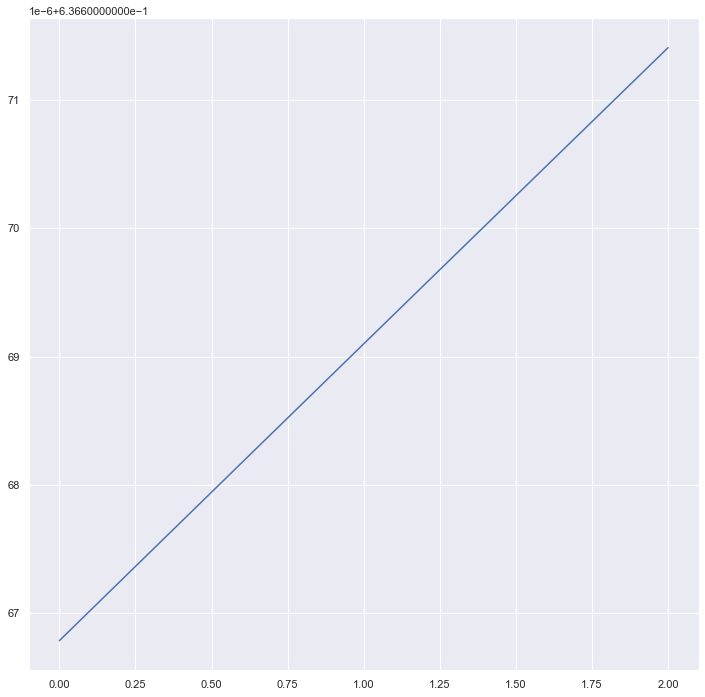

In [96]:
x = [i[0] for i in res.items()]
y = [i[1] for i in res.items()]
print(y)
plt.plot(x, y)

## L1 с масштабированием

In [88]:
res_scale = {}
for i in alphas:
    LassoReg = Lasso(alpha = i)
    LassoReg.fit(Xtrain_scaled, ytrain)
    predLasso = LassoReg.predict(Xtest_scaled)
#     res.append({i: metrics.r2_score(ytrain, predLasso)})
    res_scale[i] = metrics.r2_score(ytest, predLasso)
print(res_scale)

ValueError: Expected 2D array, got scalar array instead:
array=MinMaxScaler().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<AxesSubplot:>

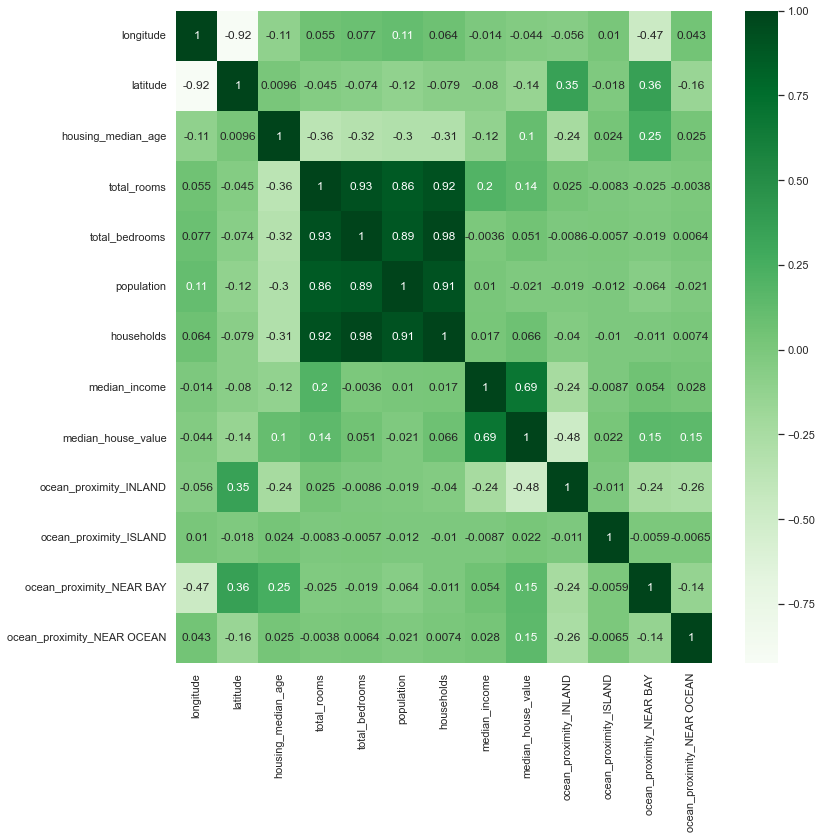

In [33]:
import seaborn as sb
sb.set(rc={'figure.figsize':(12,12)})
с = train.corr()
sb.heatmap(train.corr(), cmap = "Greens", annot = True)

# Заново

## Без ничего

In [105]:
LinReg1 = LinearRegression()
LinReg1.fit(Xtrain, ytrain)
pred1 = LinReg1.predict(Xtest)
print(metrics.r2_score(ytest, pred1))
print(metrics.mean_absolute_error(ytest, pred1))
print(f"RMSE = {sqrt(metrics.mean_squared_error(ytest, pred1))}")
print(cross_val_score(LinReg1, Xtest, ytest, cv = 5, scoring = "neg_root_mean_squared_error"))
print(ytest)
print(pred1)

0.6392361620660219
51132.41069047862
RMSE = 69675.74711633893
[-71273.99906985 -71609.78165778 -70592.56349731 -68522.33085896
 -66800.61178853]
7834     129200.0
12458    185200.0
2813     200000.0
10483    165100.0
6697     111300.0
           ...   
11872    213900.0
12452    362700.0
11056    154600.0
7292     161100.0
6176      62900.0
Name: median_house_value, Length: 3612, dtype: float64
[105766.70564516 248234.78559533 244048.88299319 ... 148002.24159021
 135285.66092146  76972.92601757]


## L1 без остального


In [106]:
i1 = 79
LinReg2 = Lasso(alpha = i1)
LinReg2.fit(Xtrain, ytrain)
pred2 = LinReg2.predict(Xtest)
print(f"alpha = {i1}:    R2 = {metrics.r2_score(ytest, pred2)}    CV = {cross_val_score(LinReg2, Xtest, ytest, cv = 5, scoring = 'r2').mean()}")

print(f"RMSE = {sqrt(metrics.mean_squared_error(ytest, pred2))}")

print(ytest)
print(pred2)

alpha = 79:    R2 = 0.6383642528975104    CV = 0.636122888527488
RMSE = 69759.89393801996
7834     129200.0
12458    185200.0
2813     200000.0
10483    165100.0
6697     111300.0
           ...   
11872    213900.0
12452    362700.0
11056    154600.0
7292     161100.0
6176      62900.0
Name: median_house_value, Length: 3612, dtype: float64
[105710.90799731 248223.04165196 243487.65172922 ... 147963.34572243
 135854.97874378  77313.90716513]


## L2 без остального

In [45]:
i2 = 75
LinReg3 = Ridge(alpha = i2)
LinReg3.fit(Xtrain, ytrain)
pred3 = LinReg3.predict(Xtest)
print(f"alpha = {i2}:    R2 = {metrics.r2_score(ytest, pred3)}    CV = {cross_val_score(LinReg3, Xtest, ytest, cv = 5, scoring = 'r2').mean()}")


print(ytest)
print(pred3)

alpha = 75:    R2 = 0.6385000736540896    CV = 0.6359650110045343
7834     129200.0
12458    185200.0
2813     200000.0
10483    165100.0
6697     111300.0
           ...   
11872    213900.0
12452    362700.0
11056    154600.0
7292     161100.0
6176      62900.0
Name: median_house_value, Length: 3612, dtype: float64
[105298.0133419  247814.39898515 242916.26118833 ... 147525.80356696
 136486.42678045  77971.96863715]


## Масштабирование без ничего

In [86]:
scaler1 = StandardScaler()
Xtrain_scaled = scaler1.fit_transform(Xtrain)
Xtest_scaled = scaler1.transform(Xtest)

In [87]:
LinReg4 = LinearRegression()
LinReg4.fit(Xtrain_scaled, ytrain)
pred4 = LinReg4.predict(Xtest_scaled)
print(metrics.r2_score(ytest, pred4))
print(metrics.mean_absolute_error(ytest, pred4))
print(metrics.mean_squared_error(ytest, pred4))
print(cross_val_score(LinReg4, Xtest_scaled, ytest, cv = 5, scoring = "r2"))

print(ytest)
print(pred4)

0.6392361620660212
51132.410690478646
4854709736.220021
[0.61952196 0.6342116  0.62109592 0.64761952 0.66552088]
7834     129200.0
12458    185200.0
2813     200000.0
10483    165100.0
6697     111300.0
           ...   
11872    213900.0
12452    362700.0
11056    154600.0
7292     161100.0
6176      62900.0
Name: median_house_value, Length: 3612, dtype: float64
[105766.70564516 248234.78559533 244048.8829932  ... 148002.24159021
 135285.66092146  76972.92601757]


## Масштабирование с L1

In [91]:
i1 = 79
LinReg5 = Lasso(alpha = i1)
LinReg5.fit(Xtrain_scaled, ytrain)
pred5 = LinReg5.predict(Xtest_scaled)
print(f"alpha = {i1}:    R2 = {metrics.r2_score(ytest, pred5)}    CV = {cross_val_score(LinReg5, Xtest_scaled, ytest, cv = 5, scoring = 'r2').mean()}")
print(ytest)
print(pred5)

alpha = 79:    R2 = 0.6389360983204778    CV = 0.6376200945370676
7834     129200.0
12458    185200.0
2813     200000.0
10483    165100.0
6697     111300.0
           ...   
11872    213900.0
12452    362700.0
11056    154600.0
7292     161100.0
6176      62900.0
Name: median_house_value, Length: 3612, dtype: float64
[106329.75918257 248423.16986589 243448.68542321 ... 148566.02574446
 135080.31012942  76947.29936286]


## Масштабирование с L2

In [92]:
i2 = 100
LinReg6 = Ridge(alpha = i2)
LinReg6.fit(Xtrain_scaled, ytrain)
pred6 = LinReg6.predict(Xtest_scaled)
print(f"alpha = {i2}:    R2 = {metrics.r2_score(ytest, pred6)}    CV = {cross_val_score(LinReg6, Xtest_scaled, ytest, cv = 5, scoring = 'r2').mean()}")

print(ytest)
print(pred6)

alpha = 100:    R2 = 0.6367293922843115    CV = 0.630370346057737
7834     129200.0
12458    185200.0
2813     200000.0
10483    165100.0
6697     111300.0
           ...   
11872    213900.0
12452    362700.0
11056    154600.0
7292     161100.0
6176      62900.0
Name: median_house_value, Length: 3612, dtype: float64
[108551.70173194 248968.41459186 242116.11070007 ... 150222.97339736
 136759.01988894  76596.54101079]


## Elastic без масштабирования

In [98]:
parameters = {'alpha' : np.arange(0.1, 2.1, 0.1), 'l1_ratio' : np.arange(0.1, 1, 0.1)}
LinReg7 = ElasticNet()
gs7 = GridSearchCV(LinReg7, parameters)
gs7.fit(Xtrain, ytrain)
pred7 = gs7.predict(Xtest)
print(cross_val_score(gs7, Xtest, ytest, cv = 5, scoring = ""))

[0.62017404 0.63102539 0.62107527 0.64736855 0.66128403]


In [107]:
print(f"RMSE 1 = {sqrt(metrics.mean_squared_error(ytest, pred1))}")
print(f"RMSE 2 = {sqrt(metrics.mean_squared_error(ytest, pred2))}")
print(f"RMSE 3 = {sqrt(metrics.mean_squared_error(ytest, pred3))}")
print(f"RMSE 4 = {sqrt(metrics.mean_squared_error(ytest, pred4))}")
print(f"RMSE 5 = {sqrt(metrics.mean_squared_error(ytest, pred5))}")
print(f"RMSE 6 = {sqrt(metrics.mean_squared_error(ytest, pred6))}")
print(f"RMSE 7 = {sqrt(metrics.mean_squared_error(ytest, pred7))}")

RMSE = 69675.74711633893
RMSE = 69759.89393801996
RMSE = 69746.79272852793
RMSE = 69675.74711633899
RMSE = 69704.71734270517
RMSE = 69917.3992447611
RMSE = 69743.50409728248


In [21]:
poly = PolynomialFeatures(degree = 3, include_bias=False)
Xtrain_poly = poly.fit_transform(Xtrain)
Xtest_poly = poly.transform(Xtest)
LinReg8 = LinearRegression()
LinReg8.fit(Xtrain_poly, ytrain)
pred8 = LinReg8.predict(Xtest_poly)
print(f"RMSE 8 = {sqrt(metrics.mean_squared_error(ytest, pred8))}")
print(f"R2 8 = {metrics.r2_score(ytest, pred8)}")

RMSE 8 = 60723.56053377888
R2 8 = 0.7259850948659397


# Упрощённый запуск

In [177]:
solution = pd.read_csv('/Users/n0thing_seri0us/Downloads/housing_test_sample_solution.csv').drop(['Id'], axis = 1)
train = pd.read_csv('/Users/n0thing_seri0us/Downloads/housing_train.csv').drop(['total_bedrooms'], axis = 1)
test = pd.read_csv('/Users/n0thing_seri0us/Downloads/housing_test.csv').drop(['total_bedrooms'], axis = 1)


train = pd.get_dummies(train, drop_first = True)
test = pd.get_dummies(test, drop_first = True).drop(['Id'], axis = 1)

Xtrainn = train.drop(['median_house_value'], axis = 1)
ytrainn = train['median_house_value']

train = train.dropna()
Xtrain, Xtest, ytrain, ytest = train_test_split(train.drop(['median_house_value'], axis = 1), train['median_house_value'], test_size = 0.25, random_state = 42)

In [178]:
poly = PolynomialFeatures(degree = 3, include_bias=False)
Xtrain_poly = poly.fit_transform(Xtrain)
Xtest_poly = poly.transform(Xtest)

scaler = StandardScaler()
Xtrain_poly_scale = scaler.fit_transform(Xtrain_poly)
Xtest_poly_scale = scaler.transform(Xtest_poly)

LinReg8 = LinearRegression()
LinReg8.fit(Xtrain_poly, ytrain)
pred8 = LinReg8.predict(Xtest_poly)

# LinReg8 = Lasso(alpha = 10)
# LinReg8.fit(Xtrain_poly, ytrain)
# pred8 = LinReg8.predict(Xtest_poly)

print(f"RMSE 8 = {sqrt(metrics.mean_squared_error(ytest, pred8))}")
print(f"R2 8 = {metrics.r2_score(ytest, pred8)}")
print(ytest)
print(pred8)


RMSE 8 = 60723.56053377888
R2 8 = 0.7259850948659397
7834     129200.0
12458    185200.0
2813     200000.0
10483    165100.0
6697     111300.0
           ...   
11872    213900.0
12452    362700.0
11056    154600.0
7292     161100.0
6176      62900.0
Name: median_house_value, Length: 3612, dtype: float64
[159895.50144675 230218.95734721 238733.0947776  ... 150915.87217942
 150521.25661436  77371.2711027 ]


In [181]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipe = Pipeline( steps = [
    ('scaler', StandardScaler()),
    ('preprocessor', PolynomialFeatures(degree=2, include_bias=False)),
    ('estimator', Ridge(alpha=16.5))
    #('estimator', Ridge(alpha=16.45))
    #('estimator', ElasticNet(alpha = 100, l1_ratio = 0.9))
])

pipe.fit(Xtrainn, ytrainn)
pred9 = pipe.predict(test)
# print(f"RMSE 9 = {sqrt(metrics.mean_squared_error(ytest, pred9))}")
# print(f"R2 9 = {metrics.r2_score(ytest, pred9)}")

In [109]:
sqrt(ytest.var())

116019.30555437846

In [153]:
solve = pd.DataFrame(pipe.predict(test))
solve.to_csv("data13.csv")

In [152]:
pipe.predict(test).to_file('data13.csv', sep = '\n')

AttributeError: 'numpy.ndarray' object has no attribute 'to_file'

In [159]:
Id = pd.DataFrame(np.arange(1, 6192), columns = 'Id')


TypeError: Index(...) must be called with a collection of some kind, 'Id' was passed

In [160]:
solution

,Id,median_house_value
0,0,205311.609173
1,1,205311.609173
2,2,205311.609173
3,3,205311.609173
4,4,205311.609173
...,...,...
6187,6187,205311.609173
6188,6188,205311.609173
6189,6189,205311.609173
6190,6190,205311.609173


In [161]:
solution['median_house_value'] = solve

In [163]:
solution.to_csv('data13.csv')

In [166]:
df = pd.DataFrame(solve)
df["id"] = df.index
df.rename(columns={ 0: "median_house_value"},inplace=True)
df.to_csv('result_final.csv', index = False)

In [171]:
solution

,Id,median_house_value
0,0,221693.364743
1,1,108956.840574
2,2,141262.752884
3,3,187527.275524
4,4,333744.876658
...,...,...
6187,6187,184459.092879
6188,6188,-10126.323140
6189,6189,233159.317509
6190,6190,317876.882107


In [172]:
test

,Id,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
0,0,-122.64,38.24,40.0,1974.0,1039.0,398.0,3.7917,<1H OCEAN
1,1,-119.05,36.09,9.0,3297.0,1749.0,568.0,4.0217,INLAND
2,2,-116.98,32.85,12.0,3570.0,3321.0,666.0,4.0882,<1H OCEAN
3,3,-118.42,34.20,27.0,3201.0,3403.0,948.0,2.2377,<1H OCEAN
4,4,-118.47,34.01,41.0,2704.0,1047.0,478.0,4.4211,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6187,6187,-118.47,33.99,41.0,1146.0,833.0,270.0,2.5938,<1H OCEAN
6188,6188,-124.14,41.95,21.0,2696.0,1208.0,494.0,2.2750,NEAR OCEAN
6189,6189,-117.88,33.70,17.0,5122.0,2966.0,1339.0,3.4835,<1H OCEAN
6190,6190,-118.37,34.07,52.0,2203.0,899.0,384.0,4.2500,<1H OCEAN


In [182]:
pred9

array([226945.96672189, 150861.93326678, 133008.586653  , ...,
       244117.04077612, 297997.15234253, 247269.3109629 ])